In [1]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [2]:
import pandas as pd

In [3]:
df = pd.read_table('data/parsed/202010.tsv', index_col=0)
df

,date,time,mothermilk,milk,expressedmilk,small,big,sleep
0,2020-10-01,01:00:00,11.0,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,03:10:00,30.0,NaN,NaN,NaN,NaN,NaN
2,2020-10-01,06:45:00,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-10-01,06:45:00,NaN,NaN,NaN,1.0,NaN,NaN
4,2020-10-01,06:45:00,23.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1273,2020-10-31,23:15:00,NaN,NaN,NaN,1.0,NaN,NaN
1274,2020-10-31,23:40:00,NaN,NaN,NaN,NaN,NaN,1.0
1275,2020-10-31,23:40:00,230.0,NaN,NaN,NaN,NaN,NaN
1276,2020-10-31,23:40:00,NaN,NaN,NaN,1.0,NaN,NaN


datetime indexをセット

In [6]:
df['datetime'] = pd.to_datetime(df['date'] + 'T' + df['time'])
df = df.set_index('datetime')
df

,date,time,mothermilk,milk,expressedmilk,small,big,sleep
datetime,,,,,,,,
2020-10-01 01:00:00,2020-10-01,01:00:00,11.0,NaN,NaN,NaN,NaN,NaN
2020-10-01 03:10:00,2020-10-01,03:10:00,30.0,NaN,NaN,NaN,NaN,NaN
2020-10-01 06:45:00,2020-10-01,06:45:00,NaN,NaN,NaN,NaN,NaN,0.0
2020-10-01 06:45:00,2020-10-01,06:45:00,NaN,NaN,NaN,1.0,NaN,NaN
2020-10-01 06:45:00,2020-10-01,06:45:00,23.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-10-31 23:15:00,2020-10-31,23:15:00,NaN,NaN,NaN,1.0,NaN,NaN
2020-10-31 23:40:00,2020-10-31,23:40:00,NaN,NaN,NaN,NaN,NaN,1.0
2020-10-31 23:40:00,2020-10-31,23:40:00,230.0,NaN,NaN,NaN,NaN,NaN


In [7]:
import datetime

by_time = df.groupby(lambda x: datetime.time(hour=x.hour)).sum()

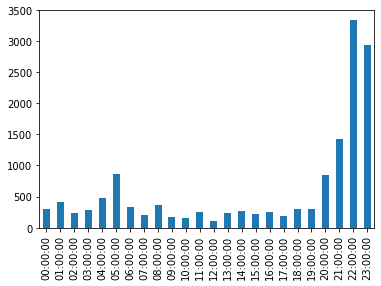

In [8]:
by_time['mothermilk'].plot.bar()

In [9]:
df.groupby('datetime').sum()

,mothermilk,milk,expressedmilk,small,big,sleep
datetime,,,,,,
2020-10-01 01:00:00,11.0,0.0,0.0,0.0,0.0,0.0
2020-10-01 03:10:00,30.0,0.0,0.0,0.0,0.0,0.0
2020-10-01 06:45:00,23.0,0.0,0.0,1.0,0.0,0.0
2020-10-01 07:50:00,0.0,0.0,0.0,1.0,1.0,0.0
2020-10-01 08:45:00,9.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-10-31 21:05:00,0.0,0.0,0.0,0.0,0.0,1.0
2020-10-31 21:50:00,12.0,0.0,0.0,0.0,0.0,0.0
2020-10-31 22:05:00,0.0,0.0,0.0,0.0,0.0,1.0


睡眠時間 (分) をsleep列にセット

In [19]:
sleep_series = pd.Series()
sleep_in_time = 0

for index, row in df.iterrows():
    if row['sleep'] == 1:
        sleep_in_time = index
    if row['sleep'] == 0 and sleep_in_time is not 0:
        delta = index - sleep_in_time
        df.loc[sleep_in_time]['sleep'] = delta.total_seconds() / 60

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


5分間隔のデータに整理

In [37]:
df_5min = df.groupby(pd.Grouper(freq='5min')).sum()

1時間ごとに、その時間に入眠した場合にどれくらい(分)眠り続けたかの平均
(5分ごとのデータで平均されるので、12をかける)

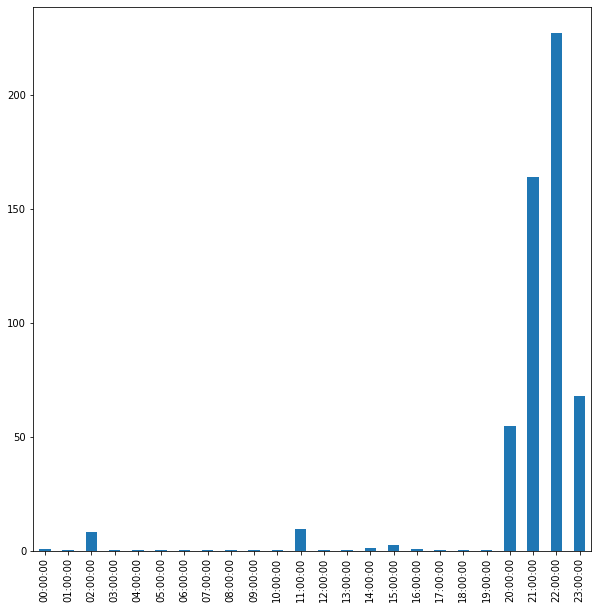

In [41]:
by_hour = df_5min.groupby(lambda x: datetime.time(hour=x.hour)).mean() * 12
by_hour['sleep'].plot.bar(figsize=(10,10))